In [14]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold


from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('df_for_ML.csv', index_col='date')
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,tournament,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
date,,,,,,,,,,,,,,
1993-08-08,24,116,8,14,8,0,85.941860,79.248175,86.538372,85.355233,76.813139,79.659854,77.708759,2
1993-08-08,52,191,35,94,7,0,71.275510,67.311111,75.413265,75.042857,72.305714,74.660417,73.423810,3
1993-08-15,9,31,52,46,7,1,78.088710,71.726190,74.718548,74.060484,68.810714,71.543210,72.527381,3
1993-08-15,179,24,22,8,7,0,79.368421,86.371622,83.721053,78.356140,86.077027,86.625000,85.312162,2
1993-08-22,6,137,5,70,7,0,80.500000,69.581395,88.286709,84.138608,70.993878,76.436735,73.813636,3


In [3]:
df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'tournament', 'shoot_out', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'result'],
      dtype='object')

# Scaling and SGDClassifer

In [4]:
X = df.drop(['result'], axis=1)
y = df['result']

## Scaling using StandScaler 
* I don't want "yet" to remove the few outliers 

In [ ]:
from sklearn.preprocessing import StandardScaler
import sklearn

Scaller = StandardScaler()
 
# standardization 
X = Scaller.fit_transform(X) 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6551, 13), (3227, 13), (6551,), (3227,))

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
clf = SGDClassifier(loss="log_loss", penalty='elasticnet' ,  alpha = 0.01) 
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', penalty='elasticnet')

In [23]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.53


In [ ]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [ ]:
losses = ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  

plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [25]:
params = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=10000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, y_train)

print(grid.best_params_)

{'alpha': 0.1, 'loss': 'log_loss', 'penalty': 'l1'}


In [27]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.57


## Train prediction and eval 

In [28]:
trainpr= grid.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

the train score is 


0.5692260723553656

In [29]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))

In [30]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,3
actual,,
0,1416,474
2,820,708
3,820,2313


In [31]:

print(classification_report(y_train, trainpr))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57      1890
           2       0.00      0.00      0.00      1528
           3       0.66      0.74      0.70      3133

    accuracy                           0.57      6551
   macro avg       0.38      0.50      0.42      6551
weighted avg       0.45      0.57      0.50      6551



C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


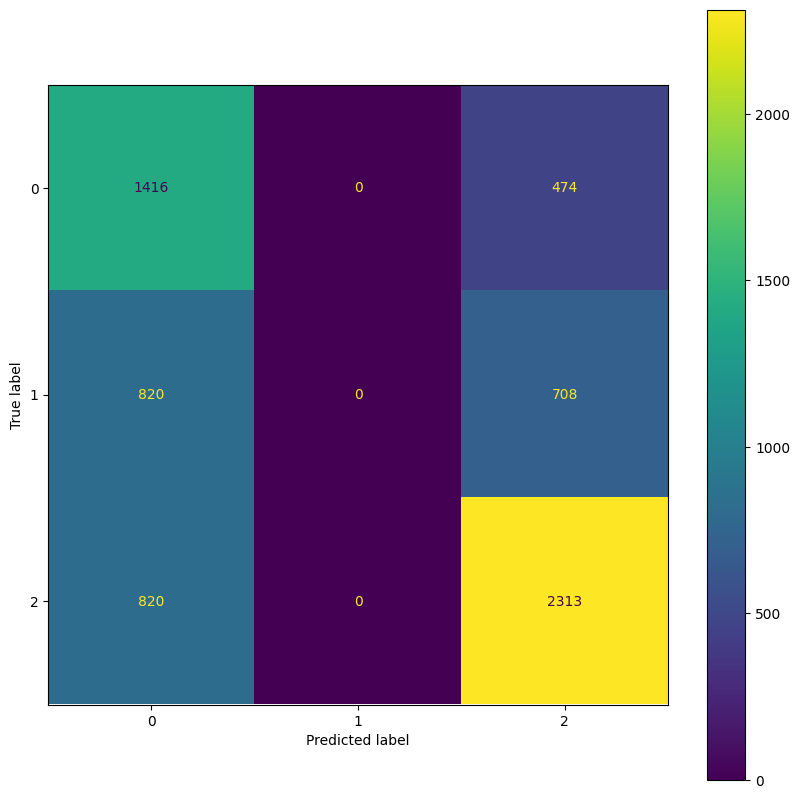

In [32]:
y_predict_train = np.where(grid.predict(X_train)<0.5, 0, 1) 

display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, trainpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

## Test prediction and eval 

In [33]:
predts = grid.predict(X_test)
errortrain = accuracy_score(y_test, predts)
print("the train score is " )
errortrain

the train score is 


0.5711186860861481

In [34]:
combine = pd.DataFrame(dict(actual=y_test, predicted=preds))

In [35]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,2,3
actual,,,
0,604,76,251
2,199,207,346
3,178,63,1303


In [36]:

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       931
           2       0.60      0.28      0.38       752
           3       0.69      0.84      0.76      1544

    accuracy                           0.66      3227
   macro avg       0.63      0.59      0.59      3227
weighted avg       0.65      0.66      0.63      3227



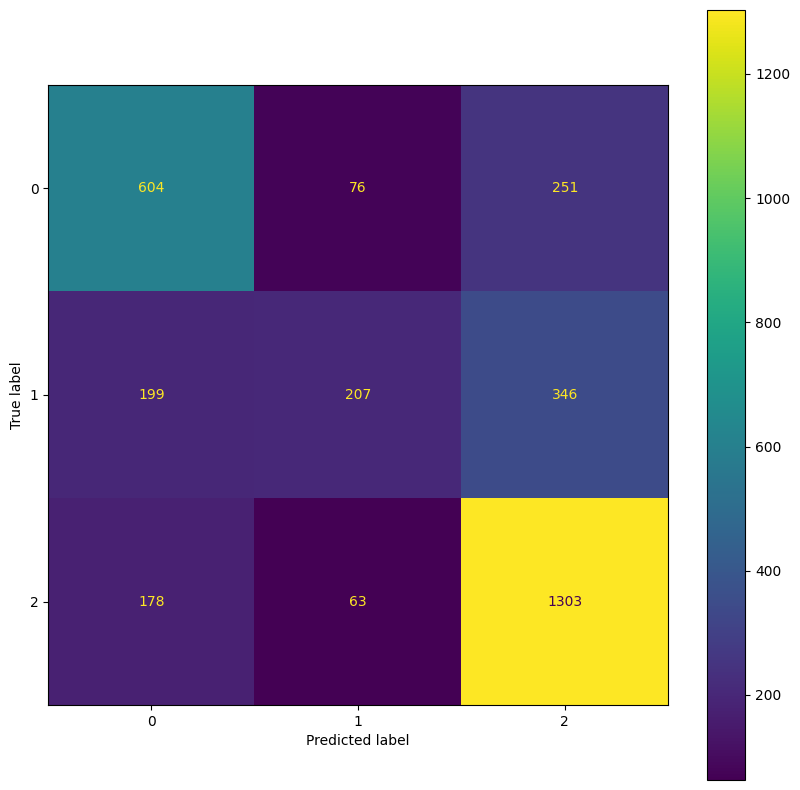

In [37]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)


plt.show()

# Random classifer 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=400, min_samples_split=10, random_state=1, max_features='sqrt')

In [ ]:
"""predictors = ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'tournament', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']"""

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

rf = GridSearchCV(rf, forest_params, cv = 10, scoring='accuracy')

print(clf.best_score_)

In [40]:
#rf.fit(train[predictors], train["result"])
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=400, random_state=1)

In [41]:
trainpreds= rf.predict(X_train)
errortrain = accuracy_score(y_train, trainpreds)
print("the train score is " )
errortrain

the train score is 


0.9261181499007785

In [42]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpreds))

In [43]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,2,3
actual,,,
0,1723,16,151
2,59,1280,189
3,57,12,3064


In [44]:

print(classification_report(y_train, trainpreds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1890
           2       0.98      0.84      0.90      1528
           3       0.90      0.98      0.94      3133

    accuracy                           0.93      6551
   macro avg       0.94      0.91      0.92      6551
weighted avg       0.93      0.93      0.93      6551



### Test 
* predict / accuracy / confusion matrix 

In [45]:
preds = rf.predict(X_test)

In [46]:
error = accuracy_score(y_test, preds)
print("the test score is " )
error

the test score is 


0.6550976138828634

In [47]:
combined = pd.DataFrame(dict(actual=y_test, predicted=preds))

In [48]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,2,3
actual,,,
0,604,76,251
2,199,207,346
3,178,63,1303


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       931
           2       0.60      0.28      0.38       752
           3       0.69      0.84      0.76      1544

    accuracy                           0.66      3227
   macro avg       0.63      0.59      0.59      3227
weighted avg       0.65      0.66      0.63      3227



# New search with rolling method on the variables "work in process"

In [ ]:
df = pd.read_csv('df_for_ML_countries_not_numeric.csv')
df.head()

In [ ]:
grouped_matches = df.groupby("home_team")

In [ ]:
group = grouped_matches.get_group("France").sort_values("date")

In [ ]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [ ]:
cols = ['home_team_score', 'away_team_score',
       'tournament', 'shoot_out', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

In [ ]:
matches_rolling = df.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [ ]:
matches_rolling = matches_rolling.droplevel('home_team')


In [ ]:
matches_rolling.index = range(matches_rolling.shape[0])

In [ ]:
matches_rolling.loc[(matches_rolling['home_team'] == 'Qatar' )]

In [ ]:
def make_predictions(data, predictors):
    train = data[data.index < '2022-10-01']
    test = data[data.index < '2022-10-01']
    rf.fit(train[predictors], train["result"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["result"], predicted=preds), index=test.index)
    error = precision_score(test["result"], preds)
    return combined, error

In [ ]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)